Task1


In [8]:
# --- Core Data Manipulation ---
import pandas as pd
import numpy as np

# --- Visualization ---
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# --- Statistics ---
from scipy import stats

# --- Notebook Settings ---
# Set higher-resolution Matplotlib plots
plt.rcParams['figure.dpi'] = 200

# Enable Plotly
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

# --- Warning Handling ---
import warnings
warnings.filterwarnings("ignore")

In [10]:
file_name = "climate_data.csv"

# Load the dataset
climate = pd.read_csv(f"./{file_name}", encoding='latin-1')

# Display the first 5 rows
climate.head()

,ObjectId,Country,ISO2,ISO3,Indicator,Unit,Source,CTS_Code,CTS_Name,CTS_Full_Descriptor,...,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021,F2022
0,1,"Afghanistan, Islamic Rep. of",AF,AFG,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.281,0.456,1.093,1.555,1.540,1.544,0.910,0.498,1.327,2.012
1,2,Albania,AL,ALB,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.333,1.198,1.569,1.464,1.121,2.028,1.675,1.498,1.536,1.518
2,3,Algeria,DZ,DZA,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.192,1.690,1.121,1.757,1.512,1.210,1.115,1.926,2.330,1.688
3,4,American Samoa,AS,ASM,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.257,1.170,1.009,1.539,1.435,1.189,1.539,1.430,1.268,1.256
4,5,"Andorra, Principality of",AD,AND,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,0.831,1.946,1.690,1.990,1.925,1.919,1.964,2.562,1.533,3.243


In [11]:
# Check datatypes by converting dtype objects to strings, then counting
(
    climate.dtypes
    .astype(str)
    .value_counts()          # Count unique string names
    .reset_index()           # Convert Series to DataFrame
    .rename(columns={'index': 'DataType', 'count': 'No_of_Columns'}) # Rename for clarity
)

,DataType,No_of_Columns
0,float64,62
1,object,9
2,int64,1


In [12]:
shape = climate.shape
print(f"Dataset shape (rows, columns): {climate.shape}")

Dataset shape (rows, columns): (225, 72)


In [13]:
# Get summary statistics for all numerical columns
climate.describe()

,ObjectId,F1961,F1962,F1963,F1964,F1965,F1966,F1967,F1968,F1969,...,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021,F2022
count,225.000000,188.000000,189.000000,188.000000,188.000000,188.000000,192.000000,191.000000,191.000000,190.000000,...,216.000000,216.000000,216.000000,213.000000,214.000000,213.000000,213.000000,212.000000,213.000000,213.000000
mean,113.000000,0.163053,-0.013476,-0.006043,-0.070059,-0.247027,0.105505,-0.110832,-0.199110,0.157942,...,0.931199,1.114815,1.269773,1.439521,1.280785,1.302113,1.443061,1.552038,1.343531,1.382113
std,65.096083,0.405080,0.341812,0.387348,0.309305,0.270734,0.378423,0.339484,0.270131,0.308540,...,0.321595,0.564903,0.462162,0.401091,0.393999,0.596786,0.467510,0.621930,0.484692,0.669279
min,1.000000,-0.694000,-0.908000,-1.270000,-0.877000,-1.064000,-1.801000,-1.048000,-1.634000,-0.900000,...,0.118000,-0.092000,-0.430000,0.250000,0.017000,0.238000,0.050000,0.229000,-0.425000,-1.305000
25%,57.000000,-0.097000,-0.164000,-0.205500,-0.236500,-0.392500,-0.035750,-0.259500,-0.340000,-0.009000,...,0.743500,0.744000,1.017750,1.147000,1.027500,0.865000,1.169000,1.161750,1.019000,0.878000
50%,113.000000,0.064500,-0.056000,-0.003000,-0.056000,-0.230500,0.098000,-0.146000,-0.187000,0.204000,...,0.897000,0.986500,1.215000,1.446000,1.282000,1.125000,1.412000,1.477000,1.327000,1.315000
75%,169.000000,0.318500,0.114000,0.230500,0.132500,-0.091500,0.277000,0.015000,-0.067000,0.349000,...,1.187500,1.335500,1.520500,1.714000,1.535000,1.834000,1.698000,1.826250,1.629000,1.918000
max,225.000000,1.892000,0.998000,1.202000,1.097000,0.857000,1.151000,1.134000,0.476000,0.939000,...,1.643000,2.704000,2.613000,2.459000,2.493000,2.772000,2.689000,3.691000,2.676000,3.243000


Data Cleaning


In [14]:
# Get a summary of missing values per column
missing_values = climate.isnull().sum()

# Filter to show only columns that *have* missing data and sort them
missing_df = missing_values[missing_values > 0].sort_values(ascending=False)

print("Missing Values Per Column:")
print(missing_df)

Missing Values Per Column:
F1977    40
F1964    37
F1961    37
F1965    37
F1985    37
         ..
F2014     9
F2015     9
F2011     8
F2007     8
ISO2      2
Length: 63, dtype: int64


In [15]:
# Create a DataFrame showing columns where missing values > 30
missing_counts = climate.isnull().sum()
cols_with_many_nulls = missing_counts[missing_counts > 30]

# Convert the resulting Series to a DataFrame for a clean view
data = pd.DataFrame(cols_with_many_nulls, columns=['Missing_Count'])
data

,Missing_Count
F1961,37
F1962,36
F1963,37
F1964,37
F1965,37
F1966,33
F1967,34
F1968,34
F1969,35
F1970,36


In [17]:
# 'data' is the DataFrame of columns with > 30 missing values
print(f"Number of columns which have missing values more than 30 is: {data.shape[0]}")

Number of columns which have missing values more than 30 is: 31


In [18]:
# Get the list of columns to drop *directly* from the 'data' DataFrame
cols_to_drop = data.index.tolist()

print(f"Dropping {len(cols_to_drop)} columns with high null counts...")

# Drop the columns
climate = climate.drop(columns=cols_to_drop)

print(f"New dataset shape: {climate.shape}")

Dropping 31 columns with high null counts...
New dataset shape: (225, 41)


In [19]:
climate.head(1)

,ObjectId,Country,ISO2,ISO3,Indicator,Unit,Source,CTS_Code,CTS_Name,CTS_Full_Descriptor,...,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021,F2022
0,1,"Afghanistan, Islamic Rep. of",AF,AFG,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.281,0.456,1.093,1.555,1.54,1.544,0.91,0.498,1.327,2.012


In [20]:
# Now we can see that the columns that had more than 30 missing values are dropped

In [21]:
climate.isnull().sum()

,0
ObjectId,0
Country,0
ISO2,2
ISO3,0
Indicator,0
Unit,0
Source,0
CTS_Code,0
CTS_Name,0
CTS_Full_Descriptor,0


In [22]:
missing = pd.DataFrame(climate.isnull().sum()[climate.isnull().sum() > 0])

In [23]:
missing.shape

(32, 1)

In [26]:
# Get the list of 32 columns that need filling
missing_cols = missing.index

# Separate them into numeric and object lists
numeric_cols_to_fill = climate[missing_cols].select_dtypes(include=np.number).columns
object_cols_to_fill = climate[missing_cols].select_dtypes(include='object').columns

print(f"Imputing {len(numeric_cols_to_fill)} numerical columns...")
print(f"Imputing {len(object_cols_to_fill)} object columns...")

# Impute Numerical Columns with MEDIAN
for col in numeric_cols_to_fill:
    median_value = climate[col].median()
    climate[col].fillna(median_value, inplace=True) # inplace=True modifies the DataFrame

# Impute Object Columns with MODE
for col in object_cols_to_fill:
    mode_value = climate[col].mode()[0] # .mode()[0] gets the most frequent value
    climate[col].fillna(mode_value, inplace=True)

print("\nImputation complete.")

# Final Verification
print("Total remaining null values:", climate.isnull().sum().sum())

Imputing 31 numerical columns...
Imputing 1 object columns...

Imputation complete.
Total remaining null values: 0


In [49]:
# 1. Inspect the 'object' columns
object_cols = climate.select_dtypes(include='object').columns
print(f"Object columns: {object_cols.tolist()}")

# 2. Check their uniqueness (number of unique values)
print("\nUnique values per object column:")
print(climate[object_cols].nunique())

Object columns: ['ISO2', 'Indicator', 'Unit', 'Source', 'CTS_Code', 'CTS_Name', 'CTS_Full_Descriptor']

Unique values per object column:
ISO2                   223
Indicator                1
Unit                     1
Source                   1
CTS_Code                 1
CTS_Name                 1
CTS_Full_Descriptor      1
dtype: int64


In [50]:
# 1. Set 'ISO3' (the unique identifier) as the index
climate.set_index('ISO3', inplace=True)

# 2. List all other non-feature columns to drop
metadata_cols = [
    'ObjectId', 'ISO2', 'Indicator', 'Unit',
    'Source', 'CTS_Code', 'CTS_Name', 'CTS_Full_Descriptor'
]

# 3. Check which ones still exist and drop them
existing_metadata = [col for col in metadata_cols if col in climate.columns]
climate_ml = climate.drop(columns=existing_metadata)

print("\n--- After Cleaning Categoricals ---")
print(f"New DataFrame shape: {climate_ml.shape}")
print("DataFrame now contains only numerical data:")
climate_ml.head(2)

KeyError: "None of ['ISO3'] are in the columns"

In [51]:
# We'll use the 'climate_ml' DataFrame from the previous step.

# First, check if 'MeanChange' exists. If not, recalculate it.
if 'MeanChange' not in climate_ml.columns:
    print("Recalculating 'MeanChange'...")
    # Get all 'F' columns from the current 'climate_ml' frame
    year_cols_ml = [col for col in climate_ml.columns if col.startswith("F")]
    climate_ml['MeanChange'] = climate_ml[year_cols_ml].mean(axis=1)


print(f"Original shape before outlier removal: {climate_ml.shape}")

# 1. Calculate IQR for the 'MeanChange' column
Q1 = climate_ml['MeanChange'].quantile(0.25)
Q3 = climate_ml['MeanChange'].quantile(0.75)
IQR = Q3 - Q1

# 2. Define the upper and lower bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 3. Filter the DataFrame, keeping only rows *within* the bounds
climate_no_outliers = climate_ml[
    (climate_ml['MeanChange'] >= lower_bound) &
    (climate_ml['MeanChange'] <= upper_bound)
]

print(f"New shape after removing outliers: {climate_no_outliers.shape}")
print(f"Removed {len(climate_ml) - len(climate_no_outliers)} outlier rows.")

Original shape before outlier removal: (225, 34)
New shape after removing outliers: (225, 34)
Removed 0 outlier rows.


In [53]:
from sklearn.preprocessing import StandardScaler

# We will use the 'climate_no_outliers' DataFrame from the last step.

# 1. Get the list of features to scale (only the year columns)
features_to_scale = [col for col in climate_no_outliers.columns if col.startswith("F")]

# 2. Create a copy to store the scaled data
climate_scaled = climate_no_outliers.copy()

# 3. Initialize the scaler
scaler = StandardScaler()

# 4. Fit the scaler to the features and transform them
climate_scaled[features_to_scale] = scaler.fit_transform(climate_scaled[features_to_scale])

print(" Data After Scaling ")
print("Your data is now fully preprocessed.")
# The head will now show scaled data (z-scores)
climate_scaled.head()

 Data After Scaling 
Your data is now fully preprocessed.


,F1992,F1993,F1994,F1995,F1996,F1997,F1998,F1999,F2000,F2001,...,F2016,F2017,F2018,F2019,F2020,F2021,F2022,MeanChange,Before2000,After2000
ISO3,,,,,,,,,,,,,,,,,,,,,
AFG,-0.986677,-0.001564,-0.360817,-0.635340,-0.995993,-0.158435,-0.798023,1.065249,0.650767,1.037835,...,0.295718,0.676031,0.432845,-1.170862,-1.742172,-0.033260,0.974817,0.916645,0.437333,1.112727
ALB,-0.249217,-0.371462,1.546077,-1.882891,-0.800478,-1.015129,-0.477212,-0.152061,0.791620,1.525799,...,0.061986,-0.416969,1.266386,0.514689,-0.082490,0.410951,0.214620,0.959871,0.434111,1.174955
DZA,-1.019862,0.851257,0.279052,-0.080873,1.415366,1.113625,0.362243,1.706182,0.312329,2.241186,...,0.814553,0.602991,-0.142368,-0.719178,0.627854,2.098531,0.476226,1.255613,0.764111,1.456682
ASM,0.189572,-0.743930,-0.871442,0.295037,1.259956,0.005981,0.084207,-1.138821,-0.067192,0.139186,...,0.254623,0.402129,-0.178534,0.215036,-0.195348,-0.158660,-0.188562,0.882726,0.491444,1.042795
AND,0.267006,-0.119726,1.923219,1.526142,0.723541,2.690720,0.118961,0.735561,0.762276,1.410984,...,1.413010,1.680340,1.078667,1.151453,1.683412,0.404575,2.869154,1.379452,0.980889,1.542500


Machine Learning


In [58]:
from sklearn.model_selection import train_test_split

# 1. Define our Features (X)
X = climate_scaled[features_to_scale].drop(columns=['F2022'])

# 2. Define our Target (y)
y = climate_scaled['F2022']

# 3. Create the Training and Testing sets (this code is the same)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42 # Ensures reproducibility
)

print(f"--- New ML Task ---")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

--- New ML Task ---
X_train shape: (180, 30)
X_test shape: (45, 30)
y_train shape: (180,)
y_test shape: (45,)


In [60]:
from sklearn.ensemble import RandomForestRegressor

# 1. Initialize the model
# n_estimators=100 is a good default
# random_state=42 ensures you get the same results
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# 2. Train the model
rf_model.fit(X_train, y_train)

# 3. Make predictions
y_pred_rf = rf_model.predict(X_test)

print("Random Forest model trained successfully!")

# 4. Evaluate the Random Forest model
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

print(f"\n--- Random Forest Evaluation ---")
print(f"R-squared (R²): {r2_rf:.3f}")
print(f"Mean Absolute Error (MAE): {mae_rf:.3f}")

Random Forest model trained successfully!

--- Random Forest Evaluation ---
R-squared (R²): 0.770
Mean Absolute Error (MAE): 0.354


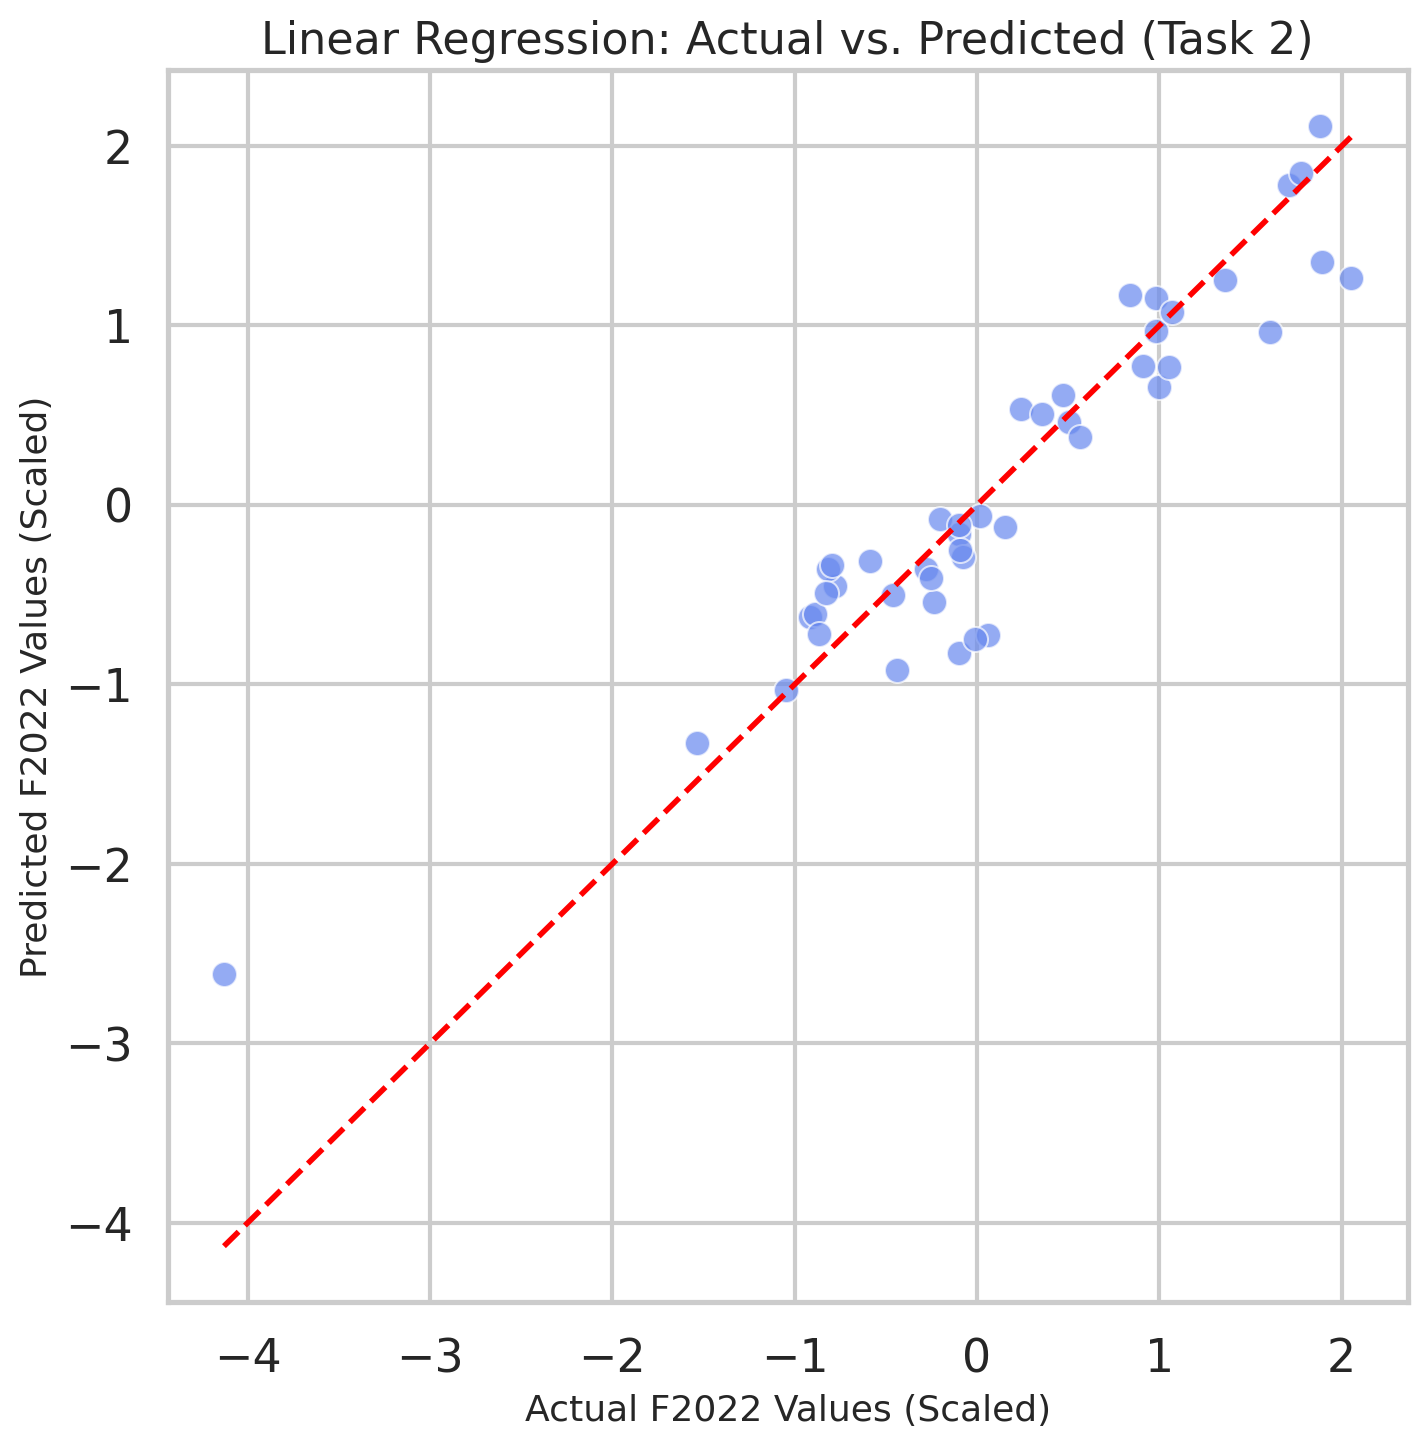

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot of Actual vs. Predicted values
plt.figure(figsize=(8, 8))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)

# Add a 45-degree (perfect prediction) line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)

plt.title('Linear Regression: Actual vs. Predicted (Task 2)')
plt.xlabel('Actual F2022 Values (Scaled)')
plt.ylabel('Predicted F2022 Values (Scaled)')
plt.show()

Visuals


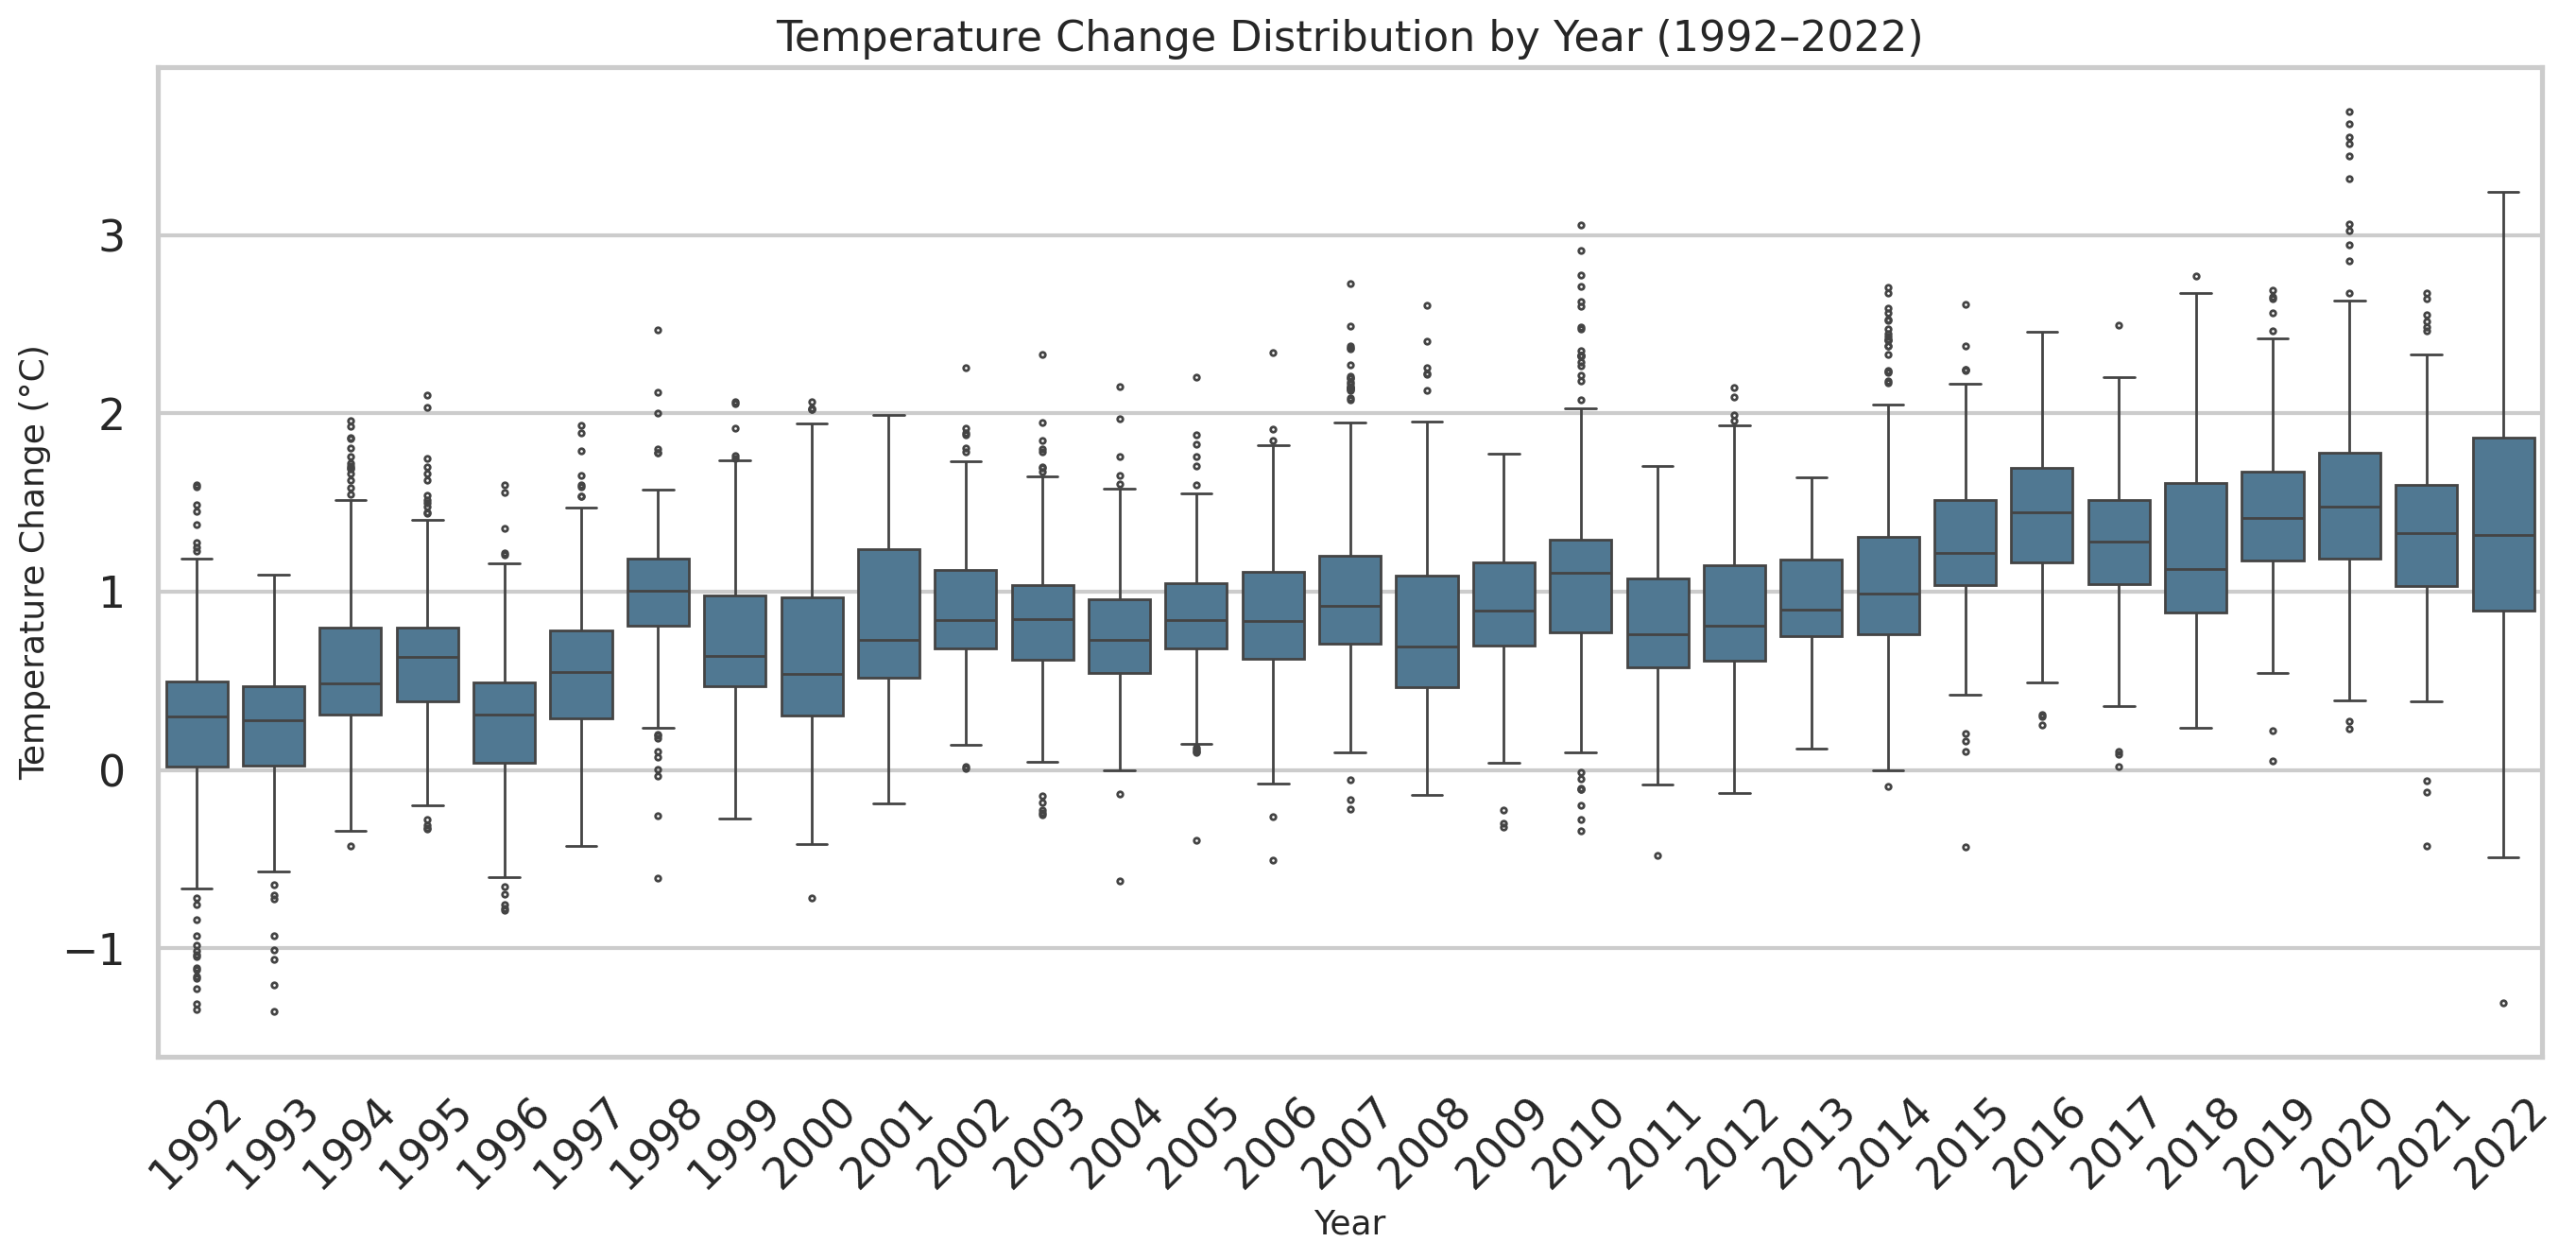

In [62]:
# 1. Melt the DataFrame to long format (if 'melted' doesn't exist)
if 'melted' not in locals():
    # Get the year columns from the 'climate' DataFrame *before* ML-specific drops
    year_cols = [col for col in climate.columns if col.startswith("F")]
    melted = climate.melt(id_vars=["ISO3"], value_vars=year_cols,
                          var_name="Year", value_name="TempChange")
    # Convert 'F1992' string to 1992 integer
    melted["Year"] = melted["Year"].str[1:].astype(int)

# 2. Plot the boxplots
plt.figure(figsize=(14, 7))
sns.boxplot(data=melted, x="Year", y="TempChange", color="#457B9D",
            fliersize=2) # Smaller outliers
plt.title("Temperature Change Distribution by Year (1992–2022)")
plt.xlabel("Year")
plt.ylabel("Temperature Change (°C)")
plt.xticks(rotation=45) # Rotate labels for readability
plt.tight_layout()
plt.show()

In [63]:
# We'll use the 'climate_ml' DataFrame from the encoding step.

# 1. Check if 'MeanChange' exists. If not, recalculate it.
if 'MeanChange' not in climate_ml.columns:
    year_cols_ml = [col for col in climate_ml.columns if col.startswith("F")]
    climate_ml['MeanChange'] = climate_ml[year_cols_ml].mean(axis=1)

print(f"Original shape before outlier removal: {climate_ml.shape}")

# 2. Calculate IQR for the 'MeanChange' column
Q1 = climate_ml['MeanChange'].quantile(0.25)
Q3 = climate_ml['MeanChange'].quantile(0.75)
IQR = Q3 - Q1

# 3. Define the upper and lower bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 4. Filter the DataFrame, keeping only rows *within* the bounds
climate_no_outliers = climate_ml[
    (climate_ml['MeanChange'] >= lower_bound) &
    (climate_ml['MeanChange'] <= upper_bound)
]

print(f"New shape after removing outliers: {climate_no_outliers.shape}")
print(f"Removed {len(climate_ml) - len(climate_no_outliers)} outlier rows.")

Original shape before outlier removal: (225, 34)
New shape after removing outliers: (225, 34)
Removed 0 outlier rows.
